In [8]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from transformers import BertTokenizer, AdamW
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler
from pys.functions import CustomBertModel, create_dataset, train_with_validation
from pys.data import train_df, val_df, filtered_labels_at_least_5_list, label_mapping
from pys.params import num_epochs
from bayes_opt import BayesianOptimization
%run decay_grid_search.ipynb

The code currently searches for hyperparameters that maximize the F1 score on the validation set. To also consider the loss and accuracy values, you can either adjust the objective function to incorporate a weighted combination of these values, or switch to a library that supports multi-objective optimization.

In [9]:
param_space = {
    'learning_rate': (1e-6, 1e-3),
    'batch_size': (16, 32)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [10]:
# helper = {}

In [11]:
def plot(acc_train, acc_val, f1_train, f1_val, loss_train, loss_val, learning_rate, batch_size):
    
    epochs = range(1, num_epochs + 1)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))  

    axes[0].plot(epochs, acc_train, color='blue', linestyle='-', label='Train Accuracy')
    axes[0].plot(epochs, acc_val, color='red', linestyle='-', label='Validation Accuracy')
    axes[0].set_title('Accuracy Over Epochs')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy (%)')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(epochs, f1_train, color='blue', linestyle='-', label='Train F1 Score')
    axes[1].plot(epochs, f1_val, color='red', linestyle='-', label='Validation F1 Score')
    axes[1].set_title('F1 Score Over Epochs')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score')
    axes[1].legend()
    axes[1].grid(True)

    axes[2].plot(epochs, loss_train, color='blue', linestyle='-', label='Train Loss')
    axes[2].plot(epochs, loss_val, color='red', linestyle='-', label='Validation Loss')
    axes[2].set_title('Loss Over Epochs')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Loss')
    axes[2].legend()
    axes[2].grid(True)

    fig.suptitle(f"Training and Validation Metrics\n"
                 f"Learning Rate: {learning_rate}, Batch Size: {batch_size}", fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [12]:
def objective(learning_rate, batch_size):
    batch_size = int(round(batch_size))
    
    model = CustomBertModel(num_labels=len(filtered_labels_at_least_5_list))
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    model.to(device)

    train_dataset = create_dataset(train_df, tokenizer, label_mapping)
    val_dataset = create_dataset(val_df, tokenizer, label_mapping)

    train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
    val_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

    # f1_train, f1_val, acc_train, acc_val, loss_train, loss_val, scheduler, scheduler_params = decay_lr_grid(
    #   model, train_loader, val_loader, optimizer, device, num_epochs
    # )

    f1_train, f1_val, acc_train, acc_val, loss_train, loss_val = train_with_validation(
            model, train_loader, val_loader, optimizer, device, num_epochs
        )

    plot(acc_train, acc_val , f1_train, f1_val, loss_train, loss_val, learning_rate, batch_size)
    
    # helper[f1_val[-1]] = {
    #         'name': scheduler.__class__.__name__,
    #         'params': scheduler_params
    #     }
    
    return f1_val[-1]

|   iter    |  target   | batch_... | learni... |
-------------------------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.206799, Accuracy: 19.047619%, F1 Score: 0.143642
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 2/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.273501, Accuracy: 20.634921%, F1 Score: 0.097466
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 3/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.523535, Accuracy: 6.349206%, F1 Score: 0.039021
Validation Accuracy: 6.250000%, Validation F1 Score: 0.007353


Training Epoch 4/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.182376, Accuracy: 9.523810%, F1 Score: 0.078942
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 5/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.240118, Accuracy: 9.523810%, F1 Score: 0.070432
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 6/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 2.209084, Accuracy: 15.873016%, F1 Score: 0.118745
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


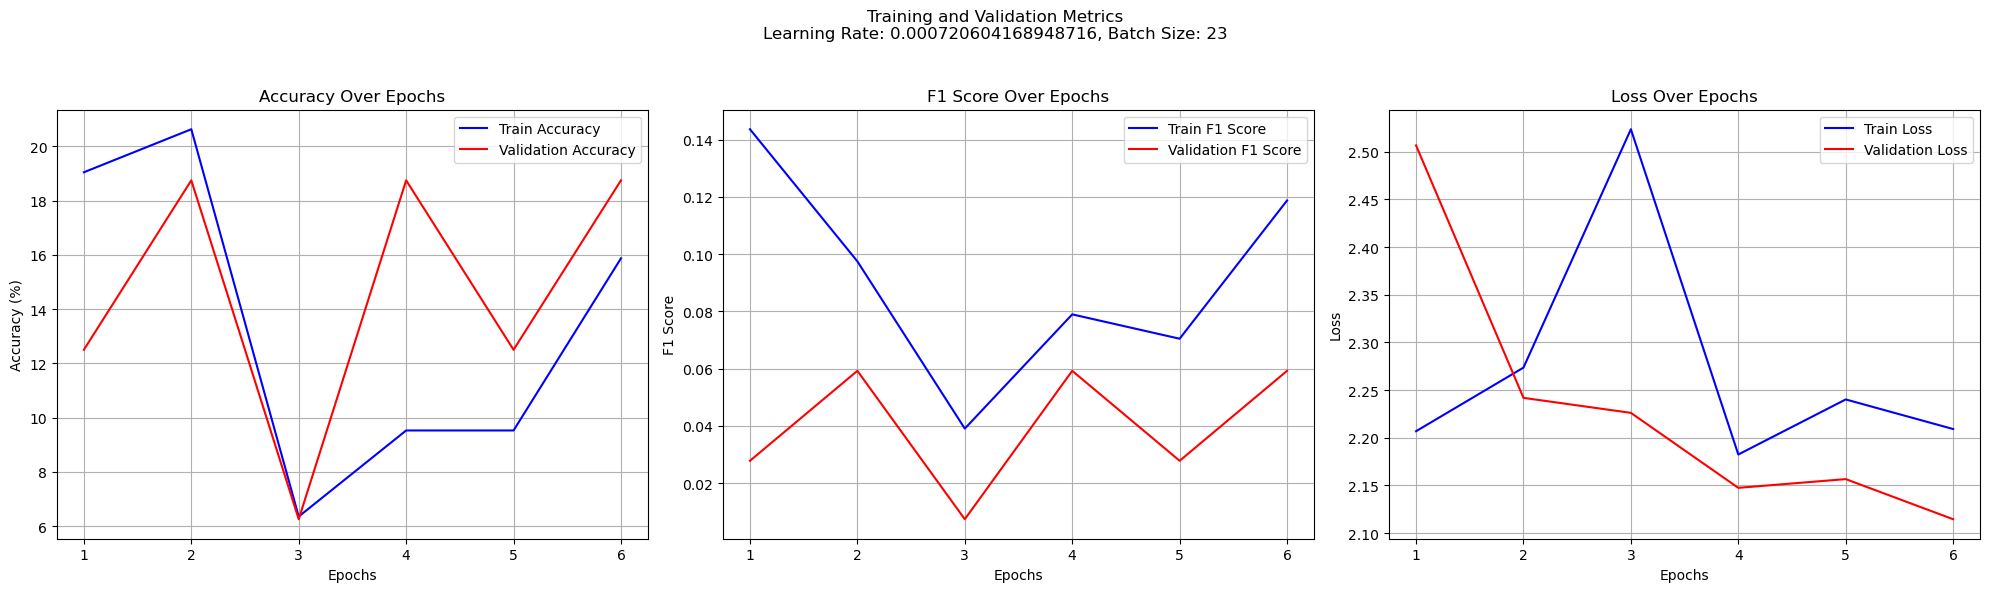

| 1         | 0.05921   | 22.67     | 0.0007206 |


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.277162, Accuracy: 11.111111%, F1 Score: 0.093561
Validation Accuracy: 12.500000%, Validation F1 Score: 0.031250


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.158879, Accuracy: 17.460317%, F1 Score: 0.069715
Validation Accuracy: 18.750000%, Validation F1 Score: 0.062500


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.111790, Accuracy: 12.698413%, F1 Score: 0.085054
Validation Accuracy: 43.750000%, Validation F1 Score: 0.329117


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.968820, Accuracy: 36.507937%, F1 Score: 0.241468
Validation Accuracy: 37.500000%, Validation F1 Score: 0.235714


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.769943, Accuracy: 33.333333%, F1 Score: 0.184252
Validation Accuracy: 31.250000%, Validation F1 Score: 0.166667


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.684706, Accuracy: 33.333333%, F1 Score: 0.208554
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


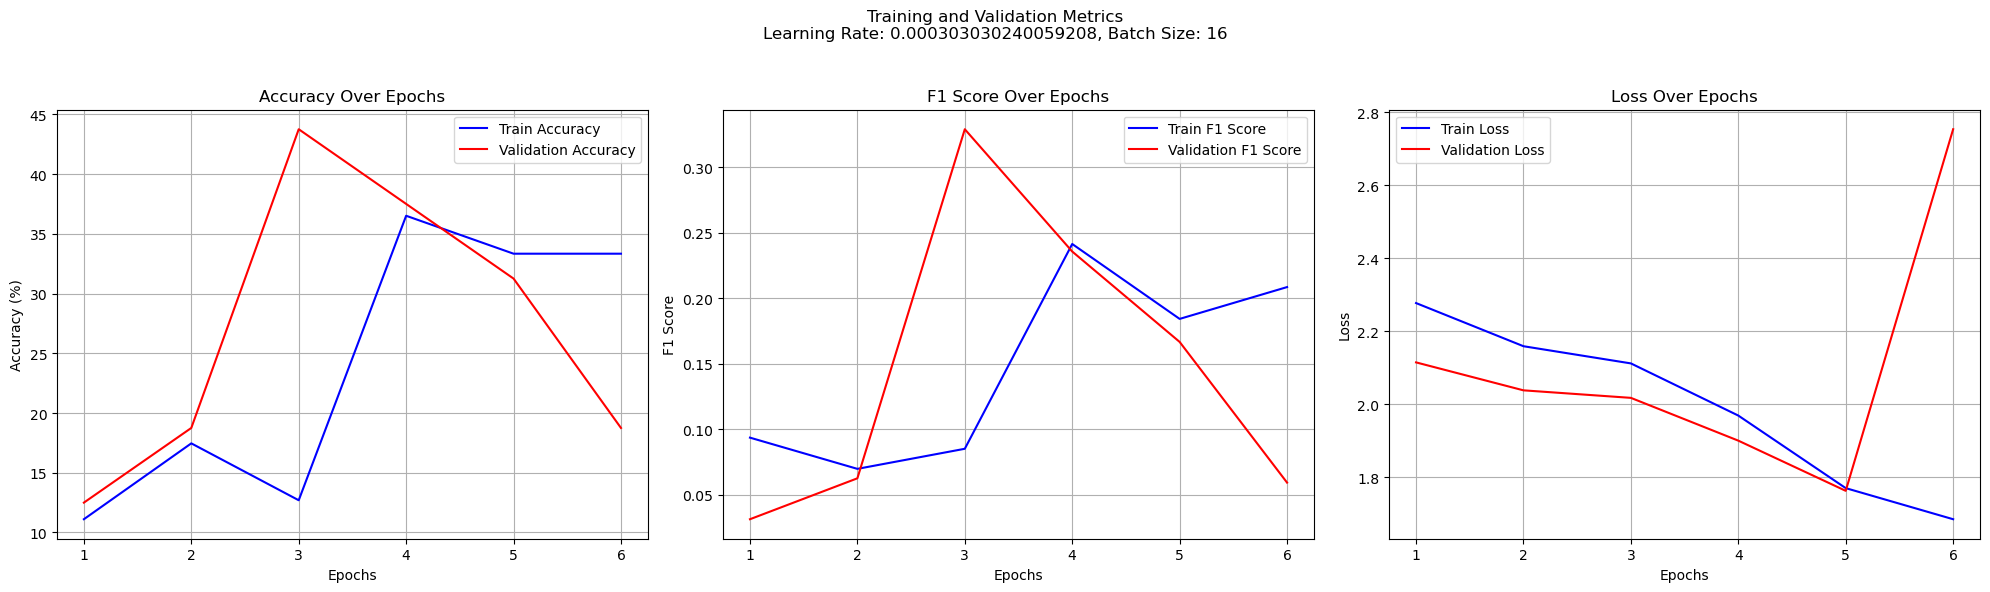

| 2         | 0.05921   | 16.0      | 0.000303  |


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.143722, Accuracy: 17.460317%, F1 Score: 0.088715
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.130986, Accuracy: 17.460317%, F1 Score: 0.072518
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.006675, Accuracy: 34.920635%, F1 Score: 0.247461
Validation Accuracy: 37.500000%, Validation F1 Score: 0.227273


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.880292, Accuracy: 47.619048%, F1 Score: 0.390023
Validation Accuracy: 43.750000%, Validation F1 Score: 0.362500


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.615391, Accuracy: 57.142857%, F1 Score: 0.488619
Validation Accuracy: 43.750000%, Validation F1 Score: 0.326231


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.341988, Accuracy: 73.015873%, F1 Score: 0.687216
Validation Accuracy: 62.500000%, Validation F1 Score: 0.481250


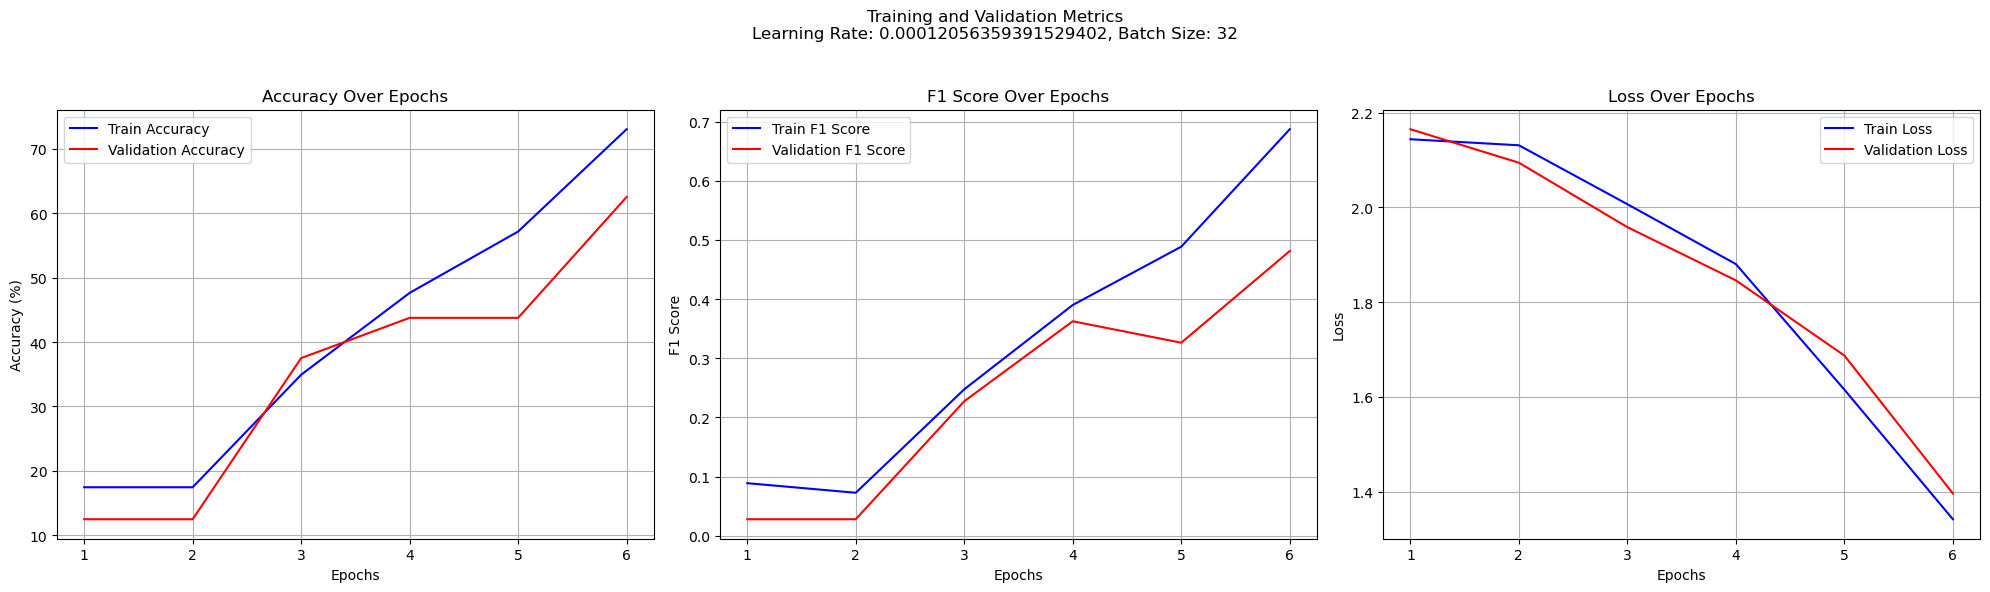

| 3         | 0.4812    | 32.0      | 0.0001206 |


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.315206, Accuracy: 17.460317%, F1 Score: 0.115344
Validation Accuracy: 0.000000%, Validation F1 Score: 0.000000


Training Epoch 2/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.226393, Accuracy: 14.285714%, F1 Score: 0.084965
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 3/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.097200, Accuracy: 12.698413%, F1 Score: 0.056880
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 4/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.365019, Accuracy: 19.047619%, F1 Score: 0.111060
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 5/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.171137, Accuracy: 6.349206%, F1 Score: 0.038534
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 6/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 2.164035, Accuracy: 11.111111%, F1 Score: 0.053680
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


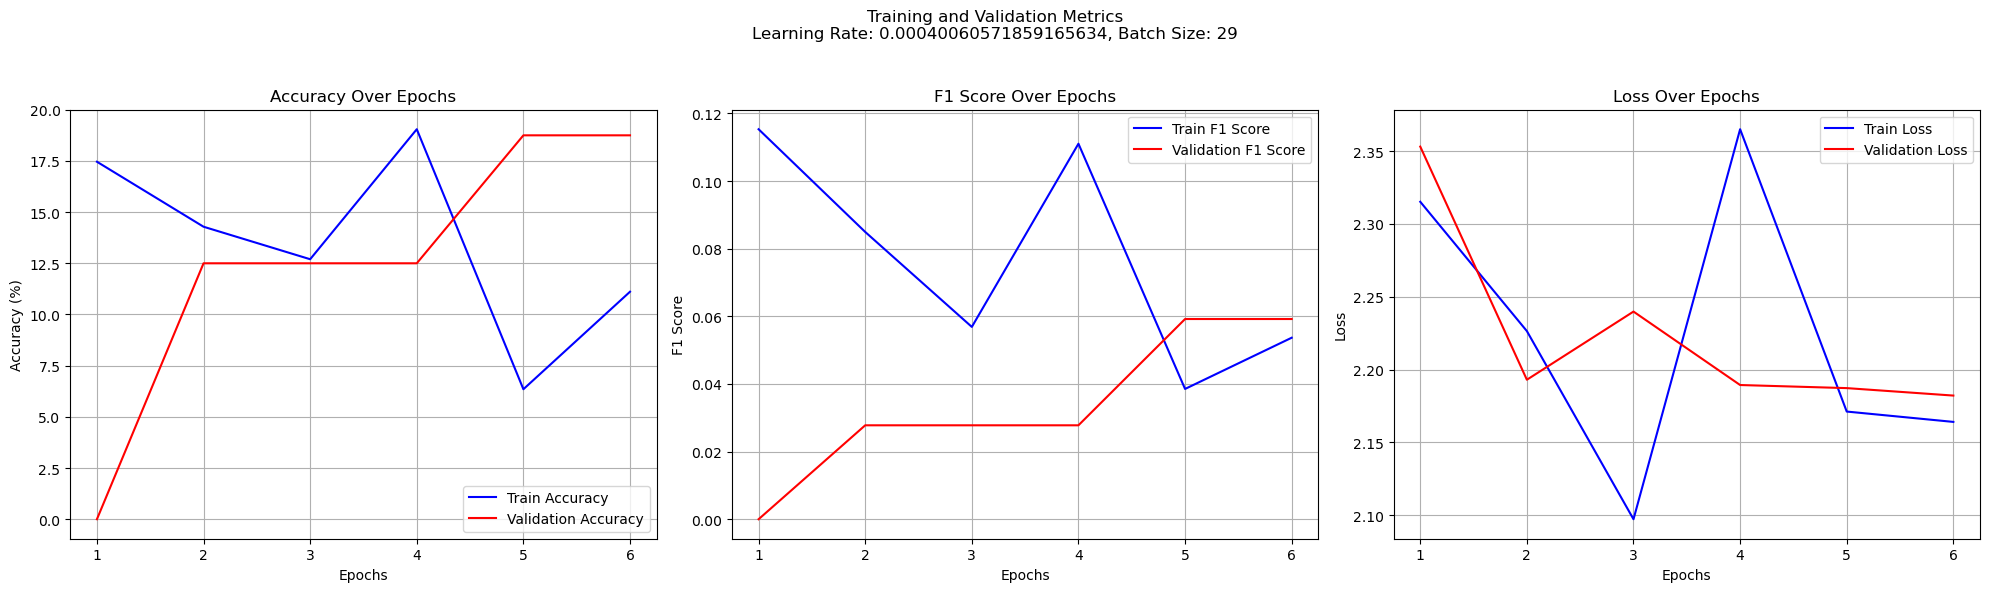

| 4         | 0.05921   | 28.93     | 0.0004006 |


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.197719, Accuracy: 22.222222%, F1 Score: 0.170563
Validation Accuracy: 6.250000%, Validation F1 Score: 0.007353


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.317240, Accuracy: 11.111111%, F1 Score: 0.045787
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.087173, Accuracy: 22.222222%, F1 Score: 0.150510
Validation Accuracy: 18.750000%, Validation F1 Score: 0.059211


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.180931, Accuracy: 15.873016%, F1 Score: 0.065217
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 2.057971, Accuracy: 20.634921%, F1 Score: 0.103333
Validation Accuracy: 18.750000%, Validation F1 Score: 0.077778


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.965623, Accuracy: 23.809524%, F1 Score: 0.168651
Validation Accuracy: 25.000000%, Validation F1 Score: 0.143750


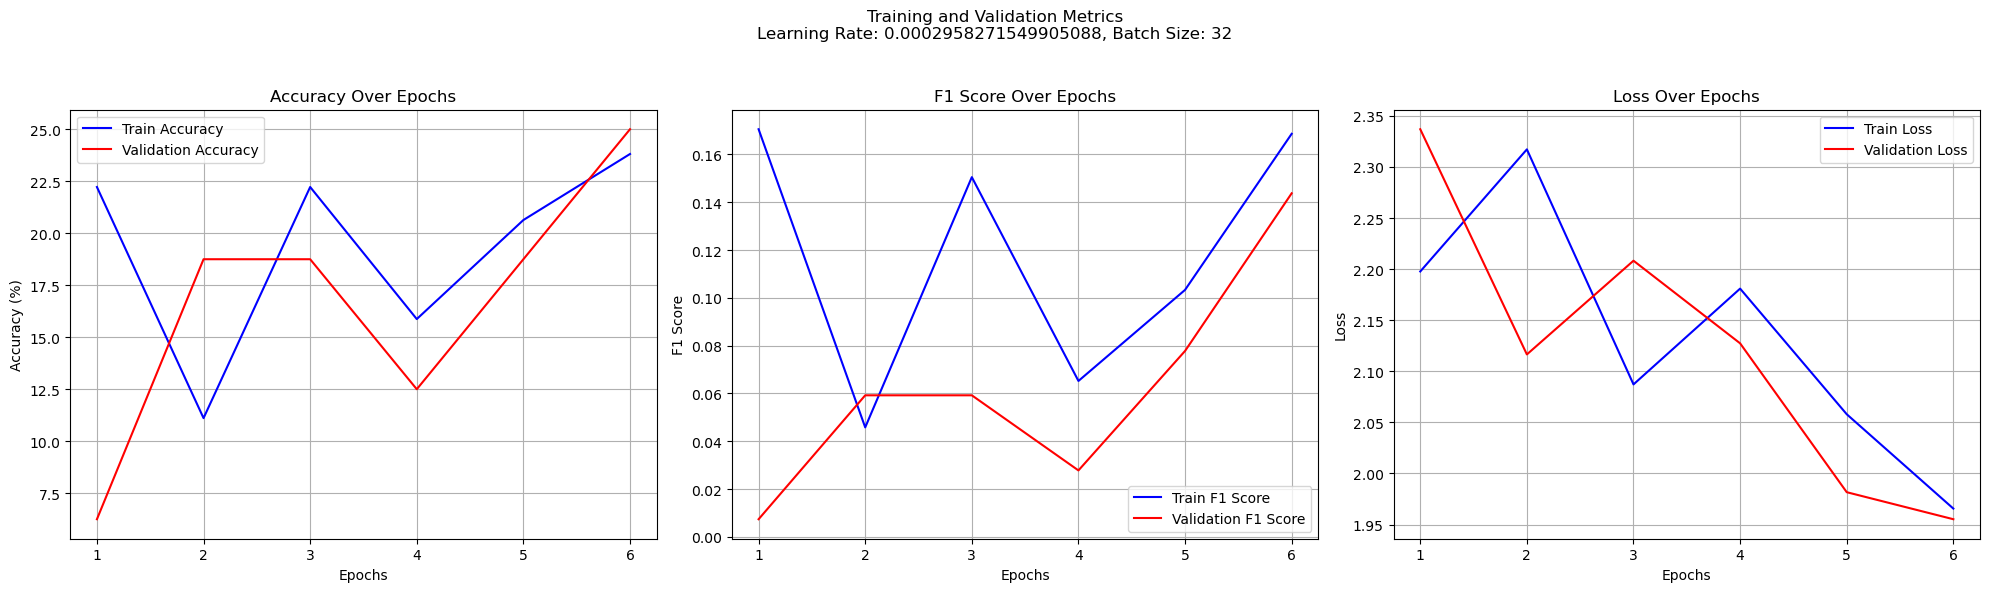

| 5         | 0.1437    | 32.0      | 0.0002958 |


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.210141, Accuracy: 17.460317%, F1 Score: 0.107914
Validation Accuracy: 18.750000%, Validation F1 Score: 0.147727


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.058422, Accuracy: 25.396825%, F1 Score: 0.197991
Validation Accuracy: 12.500000%, Validation F1 Score: 0.027778


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.049109, Accuracy: 33.333333%, F1 Score: 0.260548
Validation Accuracy: 37.500000%, Validation F1 Score: 0.257812


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.892523, Accuracy: 44.444444%, F1 Score: 0.360706
Validation Accuracy: 37.500000%, Validation F1 Score: 0.214773


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.713330, Accuracy: 57.142857%, F1 Score: 0.445163
Validation Accuracy: 37.500000%, Validation F1 Score: 0.264205


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.553350, Accuracy: 52.380952%, F1 Score: 0.417989
Validation Accuracy: 43.750000%, Validation F1 Score: 0.287500


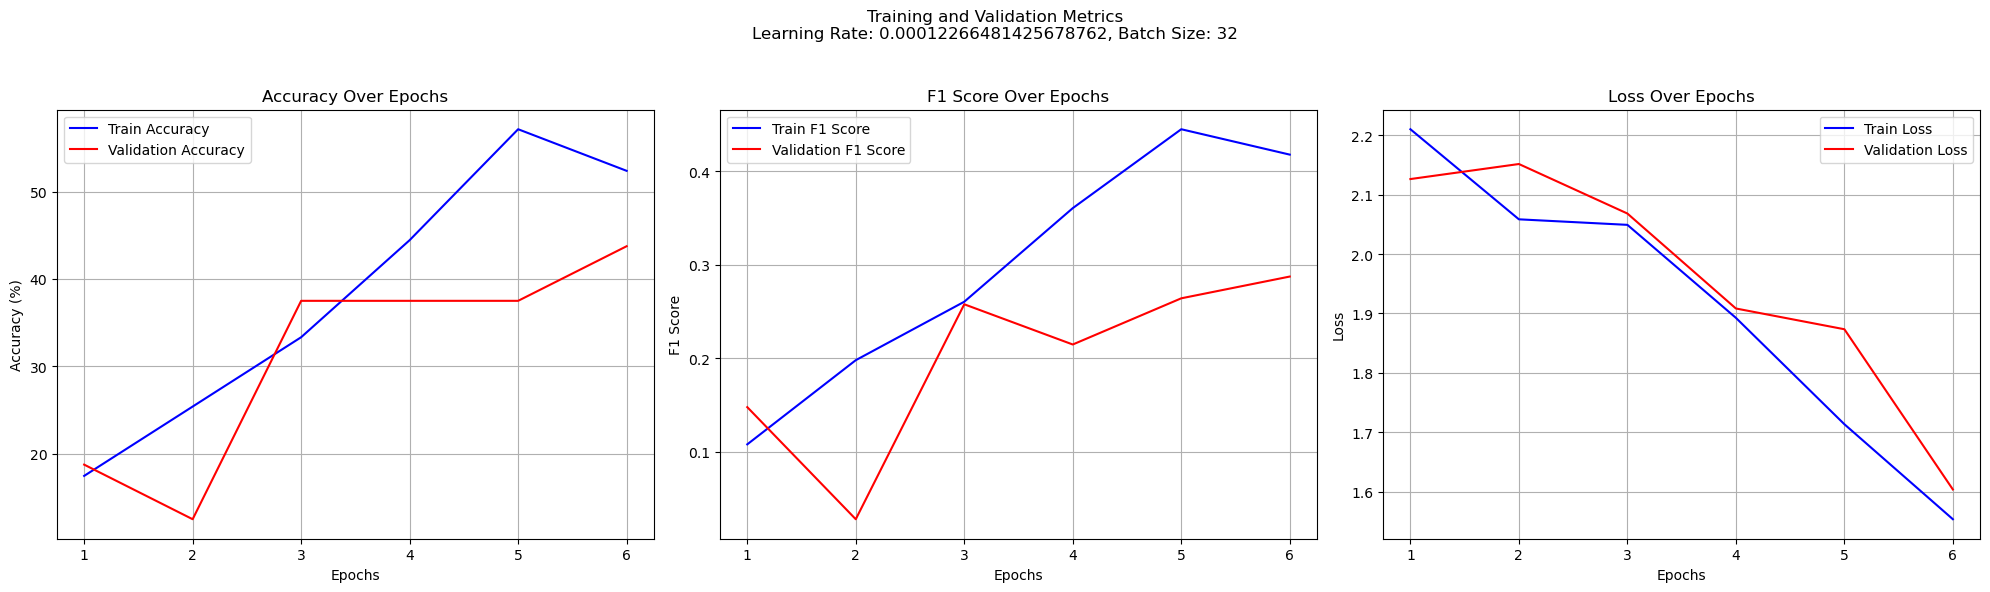

| 6         | 0.2875    | 32.0      | 0.0001227 |


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.259200, Accuracy: 9.523810%, F1 Score: 0.082179
Validation Accuracy: 18.750000%, Validation F1 Score: 0.062500


Training Epoch 2/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.095856, Accuracy: 22.222222%, F1 Score: 0.179349
Validation Accuracy: 31.250000%, Validation F1 Score: 0.149306


Training Epoch 3/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.921923, Accuracy: 42.857143%, F1 Score: 0.340779
Validation Accuracy: 43.750000%, Validation F1 Score: 0.373214


Training Epoch 4/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.603324, Accuracy: 58.730159%, F1 Score: 0.498241
Validation Accuracy: 50.000000%, Validation F1 Score: 0.404762


Training Epoch 5/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.244926, Accuracy: 65.079365%, F1 Score: 0.557176
Validation Accuracy: 56.250000%, Validation F1 Score: 0.492154


Training Epoch 6/6:   0%|          | 0/3 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 0.952391, Accuracy: 71.428571%, F1 Score: 0.656974
Validation Accuracy: 50.000000%, Validation F1 Score: 0.393669


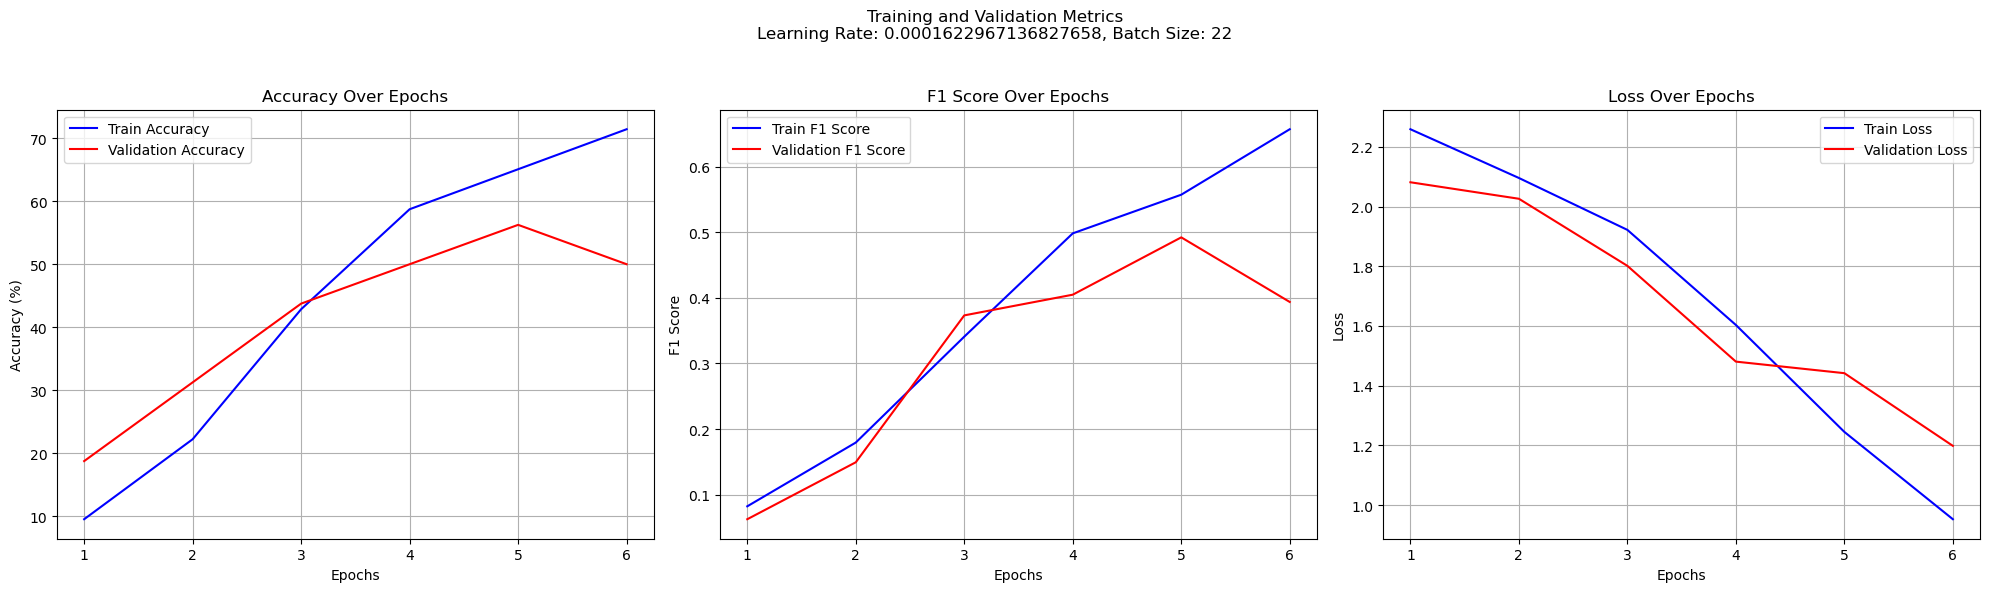

| 7         | 0.3937    | 22.33     | 0.0001623 |
Best result found:
{'target': 0.48124999999999996, 'params': {'batch_size': 31.9980126011882, 'learning_rate': 0.00012056359391529402}}


In [13]:
optimizer = BayesianOptimization(
    f=objective,
    pbounds=param_space,
    random_state=1,
)


optimizer.maximize( ############################################################################################
    init_points=2, 
    n_iter=5,       
)

print("Best result found:")
print(optimizer.max)

f1_scores = []

for res in optimizer.res:
    f1_scores.append(res['target']) 

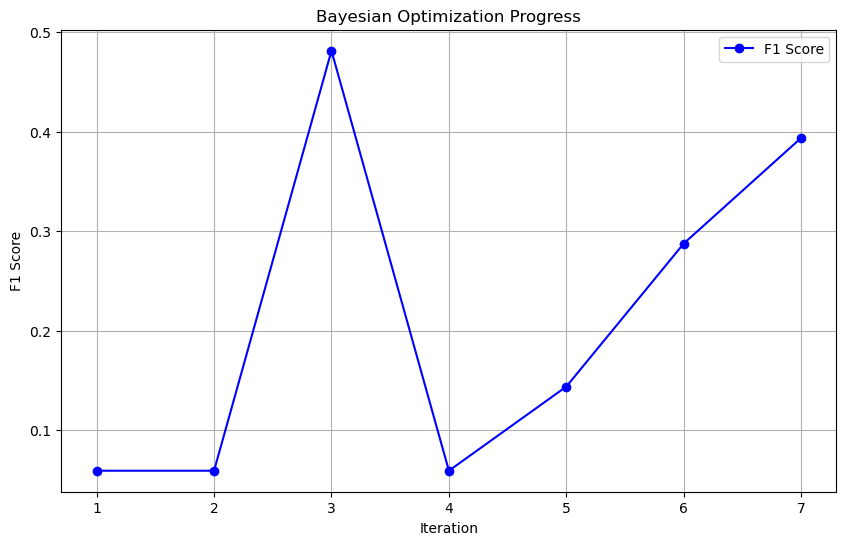

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(f1_scores)+1), f1_scores, marker='o', color='b', label='F1 Score')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.grid(True)
plt.show()

# print(helper)

In [15]:

# learning_rates = [res['params']['learning_rate'] for res in optimizer.res]
# batch_sizes = [res['params']['batch_size'] for res in optimizer.res]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(learning_rates, batch_sizes, f1_scores, c=f1_scores, cmap='coolwarm')

# ax.set_xlabel('Learning Rate')
# ax.set_ylabel('Batch Size')
# ax.set_zlabel('F1 Score')
# plt.colorbar(scatter, label='F1 Score')

# plt.title('F1 Score as a Function of Learning Rate and Batch Size')
# plt.show()

In [16]:
import math
learning_rates = [res['params']['learning_rate'] for res in optimizer.res]
batch_sizes = [res['params']['batch_size'] for res in optimizer.res]


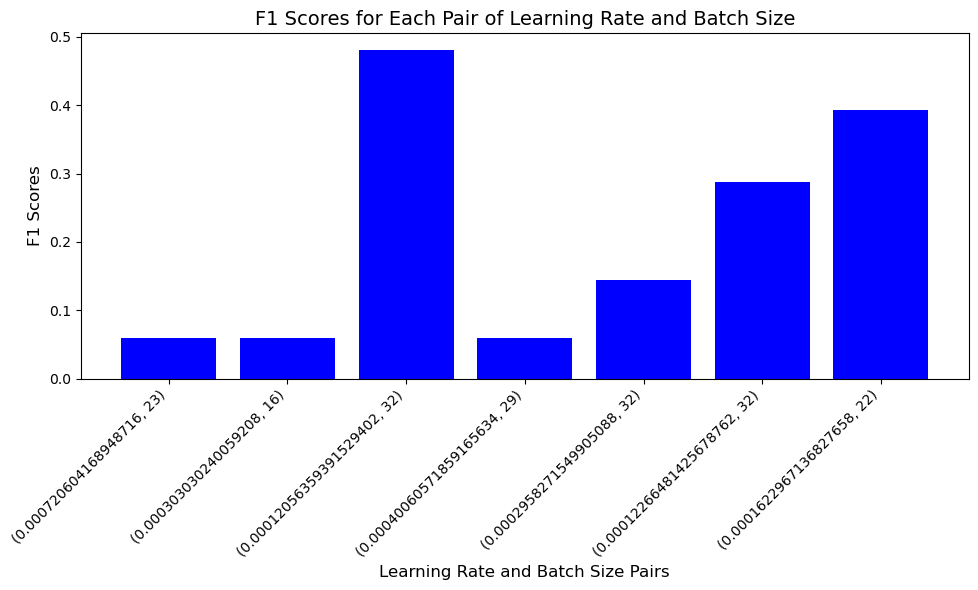

In [17]:
x_labels = [f"({lr}, {round(bs)})" for lr, bs in zip(learning_rates, batch_sizes)]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, f1_scores, color='blue')

plt.xlabel("Learning Rate and Batch Size Pairs", fontsize=12)
plt.ylabel("F1 Scores", fontsize=12)
plt.title("F1 Scores for Each Pair of Learning Rate and Batch Size", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()